## Soil Data Analysis
Source: https://sdmdataaccess.nrcs.usda.gov/Query.aspx

Requirement: Determine representative value of organic matter present in soil and the percentiles (5%, 10%, average, 90% 95%) across the states in the US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
#Temporary Data fetched to review contents
df = pd.read_xml('./data/SDMQuery233723.xml',xpath='//Table')
df.head()

,saversion,saverest,areasymbol,areaname,lkey,musym,muname,museq,mukey,comppct_r,compname,localphase,slope_r,cokey,hzdept_r,hzdepb_r,chkey
0,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,7,Pend Oreille variant,None,35.0,14197345,0.0,43.0,40837928.0
1,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,7,Pend Oreille variant,None,35.0,14197345,43.0,69.0,40837929.0
2,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,7,Pend Oreille variant,None,35.0,14197345,69.0,152.0,40837930.0
3,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,54,Stien,None,10.0,14197348,0.0,10.0,40837934.0
4,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,54,Stien,None,10.0,14197348,10.0,38.0,40837935.0


In [6]:
df[df["lkey"]==15970]

,saversion,saverest,areasymbol,areaname,lkey,musym,muname,museq,mukey,comppct_r,compname,localphase,slope_r,cokey,hzdept_r,hzdepb_r,chkey
0,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,7,Pend Oreille variant,None,35.0,14197345,0.0,43.0,40837928.0
1,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,7,Pend Oreille variant,None,35.0,14197345,43.0,69.0,40837929.0
2,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,7,Pend Oreille variant,None,35.0,14197345,69.0,152.0,40837930.0
3,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,54,Stien,None,10.0,14197348,0.0,10.0,40837934.0
4,3,10/13/2016 12:28:22 PM,US,United States,15970,s2201,Stien-Seelovers-Pend orielle variant (s2201),2453,662058,54,Stien,None,10.0,14197348,10.0,38.0,40837935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334243,3,10/13/2016 12:28:22 PM,US,United States,15970,s8361,Scantic-Lamoine-Buxton (s8361),8586,675398,22,Scantic,None,2.0,14266233,28.0,74.0,41058619.0
334244,3,10/13/2016 12:28:22 PM,US,United States,15970,s8361,Scantic-Lamoine-Buxton (s8361),8586,675398,22,Scantic,None,2.0,14266233,74.0,165.0,41058620.0
334245,3,10/13/2016 12:28:22 PM,US,United States,15970,s8361,Scantic-Lamoine-Buxton (s8361),8586,675398,2,Marlow,None,12.0,14266236,79.0,165.0,41058629.0
334246,3,10/13/2016 12:28:22 PM,US,United States,15970,s8361,Scantic-Lamoine-Buxton (s8361),8586,675398,2,Marlow,None,12.0,14266236,0.0,15.0,41058630.0


In [136]:
#Actual Data added recently in 2021 (across 5 sheets in excel)
df = pd.read_excel('./data/Aggregate Soil Organic Matter US States.xlsx',None)

In [137]:
print(df.keys())

dict_keys(['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5'])


In [140]:
df_set1 = pd.DataFrame()
df_set1 = df['Set 1']

In [11]:
df_set1.head()

,Date Added,Area Symbol,Area Name,Map Unit Name,Component Name,Component Percentage,Horizon Name,Depth in inches,Organic Matter Low,Organic Matter RV,Organic Matter High
0,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Kiner,20.0,Bw1,1.17-7.41,1.0,2.0,3.0
1,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Kiner,20.0,Bw2,7.41-15.60,1.0,1.0,2.0
2,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Itiruk,35.0,Oe,0.00-2.73,60.0,75.0,95.0
3,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Itiruk,35.0,AE,2.73-4.68,10.0,12.0,15.0
4,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Itiruk,35.0,Bw,10.92-24.18,2.0,3.0,5.0


In [138]:
df_set2 = df['Set 2']
df_set3 = df['Set 3']
df_set4 = df['Set 4']
df_set5 = df['Set 5']

In [141]:
df = pd.concat([df_set1,df_set2,df_set3,df_set4,df_set5])

In [142]:
del df_set1,df_set2,df_set3,df_set4,df_set5

In [10]:
len(df.index)

3815608

In [12]:
df['Area Name'].unique()

array(['Nulato Hills Area, Alaska', 'Miami-Dade County Area, Florida',
       'St. Lucie County, Florida', ...,
       'Challis National Forest, Western Part, Idaho',
       'Gifford Pinchot National Forest Area, Washington',
       'Bangor Naval Station, Washington'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815608 entries, 0 to 554658
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date Added            datetime64[ns]
 1   Area Symbol           object        
 2   Area Name             object        
 3   Map Unit Name         object        
 4   Component Name        object        
 5   Component Percentage  float64       
 6   Horizon Name          object        
 7   Depth in inches       object        
 8   Organic Matter Low    float64       
 9   Organic Matter RV     float64       
 10  Organic Matter High   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 349.3+ MB


In [8]:
#Tried fetching Statename from Area Name concatenation but it didn't work well
df['State']=df['Area Name'].str.split(pat=',',n=1,expand=True)[1]

In [9]:
df['State']= df['State'].str.split(pat=',',n=1,expand=True)[0]

In [10]:
df.State.unique()

array([' Alaska', ' Florida', ' Georgia', ' Delaware', ' Broward County',
       ' Aberdeen Proving Ground', ' Illinois', ' Colorado',
       ' Eastern Part', ' California', ' Idaho', ' Colorado and Utah',
       ' Campbell', ' Colorado and New Mexico', ' California and Nevada',
       ' Idaho County', ' Indiana', ' Gallatin', ' Idaho and Wyoming',
       ' Idaho-Washington-Montana', ' Bacon', '  Georgia', ' Dodge',
       ' Evans', ' Eastern Part and Southwestern Part of Trinity County',
       ' Central Part', ' Hancock', ' Idaho and Nevada', ' Arkansas',
       ' Franklin', ' Black Hills Parts', ' Fayette', ' Heard', ' Iowa',
       ' Alabama', ' Floyd', ' Gilmer', ' Fort Irwin', ' Hawaii',
       ' Arizona', ' Alamagan', ' Federated States of Micronesia',
       ' Hall', ' Arno', ' Coachella Valley Area',
       ' Arizona Parts of Cochise and Graham Counties', ' Chandler',
       '  Alaska', ' Keys Area', ' Missouri', ' Maryland', ' Minnesota',
       ' Maine', ' New Jersey', ' Jon

In [11]:
df['State'] = df.State.str.strip()

In [24]:
states = json.load(open('us_states.json','rb'))
state_names =  [i['name'] for i in states['data']]
state_names

{'data': [{'name': 'Alabama', 'abbreviation': 'AL'},
  {'name': 'Alaska', 'abbreviation': 'AK'},
  {'name': 'American Samoa', 'abbreviation': 'AS'},
  {'name': 'Arizona', 'abbreviation': 'AZ'},
  {'name': 'Arkansas', 'abbreviation': 'AR'},
  {'name': 'California', 'abbreviation': 'CA'},
  {'name': 'Colorado', 'abbreviation': 'CO'},
  {'name': 'Connecticut', 'abbreviation': 'CT'},
  {'name': 'Delaware', 'abbreviation': 'DE'},
  {'name': 'District Of Columbia', 'abbreviation': 'DC'},
  {'name': 'Federated States Of Micronesia', 'abbreviation': 'FM'},
  {'name': 'Florida', 'abbreviation': 'FL'},
  {'name': 'Georgia', 'abbreviation': 'GA'},
  {'name': 'Guam', 'abbreviation': 'GU'},
  {'name': 'Hawaii', 'abbreviation': 'HI'},
  {'name': 'Idaho', 'abbreviation': 'ID'},
  {'name': 'Illinois', 'abbreviation': 'IL'},
  {'name': 'Indiana', 'abbreviation': 'IN'},
  {'name': 'Iowa', 'abbreviation': 'IA'},
  {'name': 'Kansas', 'abbreviation': 'KS'},
  {'name': 'Kentucky', 'abbreviation': 'KY'},
  {

In [16]:
valid_state_indicator = df['State'].isin(state_names)
df['State Valid Flag'] = 0
df.loc[valid_state_indicator,'State Valid Flag'] = 1

In [149]:
df[df['State Valid Flag'] == 0]['Area Name'].unique()

array([], dtype=object)

In [143]:
#Adding State codes based on splitting first two characters from area symbol
df['State'] = df['Area Symbol'].str[:2]

In [144]:
state_code =  [i['abbreviation'] for i in states['data']]
state_code

['AL',
 'AK',
 'AS',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FM',
 'FL',
 'GA',
 'GU',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MH',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'MP',
 'OH',
 'OK',
 'OR',
 'PW',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VI',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [148]:
#Validating if all values match, found a New Mexico state value that didn't match
valid_state_indicator = df['State'].isin(state_code)
df['State Valid Flag'] = 0
df.loc[valid_state_indicator,'State Valid Flag'] = 1

In [147]:
#Fix New Mexico state data
mexico_flag = df['Area Name'].isin(['Predio El Jabali, parts of Lampazos de Naranjo, Nuevo Leon and Progresso, Coahuila Municipalities, Mexico'])
df.loc[mexico_flag,'State']='NM'

In [150]:
df.drop(['State Valid Flag'],axis=1,inplace=True)

In [151]:
df.head()

,Date Added,Area Symbol,Area Name,Map Unit Name,Component Name,Component Percentage,Horizon Name,Depth in inches,Organic Matter Low,Organic Matter RV,Organic Matter High,State
0,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Kiner,20.0,Bw1,1.17-7.41,1.0,2.0,3.0,AK
1,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Kiner,20.0,Bw2,7.41-15.60,1.0,1.0,2.0,AK
2,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Itiruk,35.0,Oe,0.00-2.73,60.0,75.0,95.0,AK
3,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Itiruk,35.0,AE,2.73-4.68,10.0,12.0,15.0,AK
4,2022-03-22 22:19:38,AK630,"Nulato Hills Area, Alaska","Chiroskey-Itiruk-Kiner association, 0 to 65 pe...",Itiruk,35.0,Bw,10.92-24.18,2.0,3.0,5.0,AK


#### Cleanup

1. Removed Null Organic Matter Representative Value Data as that is the main value we are tracking
2. Removed Null Soil Component and Horizon Name data  (since Organic Matter is by component)
3. Set Null Organic Matter Low and High as 0 when null
4. Removed Horizon name that begins with '^' as it is not valid (Ref: https://www.fao.org/3/w8594e/w8594e0g.htm)

In [192]:
df['Organic Matter RV'].isnull().values.any()

False

In [191]:
df = df[~df['Organic Matter RV'].isnull()]

In [ ]:
df[['Organic Matter Low', 'Organic Matter High']] = df[['Organic Matter Low', 'Organic Matter High']].fillna(value=0)

In [203]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Horizon Name    0.002077
dtype: float64

In [202]:
df=df[~df['Component Percentage'].isnull()]

In [206]:
df['Horizon Name'].isna().sum()

69

In [207]:
df=df[~df['Horizon Name'].isnull()]

In [218]:
len(df.index)

3310553

In [217]:
df = df[~df['Horizon Name'].astype(str).str.startswith('^')]

In [230]:
df_horizon_name = df['Horizon Name'].value_counts()

In [231]:
df_horizon_name.to_csv('./data/US_Soil_Horizon_Name.csv')

In [238]:
## Added state name for Visualization later
for i in states['data']:
    state_index = df['State'].isin([i['abbreviation']])
    df.loc[state_index,'State Name']=i['name']
    

/var/folders/g6/4mchfs9501l2ssyjh_01wgj80000gn/T/ipykernel_781/557693412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[state_index,'State Name']=i['name']


Determining Soil Profile by State - Fetching 5th, 10th, 90th and 95th percentiles along with mean of Soil Organic Matter's representative value (in Percent)

In [240]:
df_state_mean = df.groupby(['State'],as_index=False)['Organic Matter RV'].mean()
df_state_mean

,State,Organic Matter RV
0,AK,26.087614
1,AL,1.107224
2,AR,1.858054
3,AS,6.004133
4,AZ,0.968006
5,CA,4.716398
6,CO,3.948122
7,CT,7.458794
8,DC,0.939934
9,DE,4.282179


In [241]:
df['Organic Matter RV Mean'] = df['State'].map(dict(zip(df_state_mean['State'],df_state_mean['Organic Matter RV']))).fillna(0)
del df_state_mean

/var/folders/g6/4mchfs9501l2ssyjh_01wgj80000gn/T/ipykernel_781/4271394694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Organic Matter RV Mean'] = df['State'].map(dict(zip(df_state_mean['State'],df_state_mean['Organic Matter RV']))).fillna(0)


In [242]:
df_state_low = df.groupby(['State'],as_index=False)['Organic Matter Low'].min()
df_state_low.head()

,State,Organic Matter Low
0,AK,0.0
1,AL,0.0
2,AR,0.0
3,AS,0.0
4,AZ,0.0


In [243]:
df['Organic Matter Low By State'] = df['State'].map(dict(zip(df_state_low['State'],df_state_low['Organic Matter Low']))).fillna(0)
del df_state_low

/var/folders/g6/4mchfs9501l2ssyjh_01wgj80000gn/T/ipykernel_781/3366822590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Organic Matter Low By State'] = df['State'].map(dict(zip(df_state_low['State'],df_state_low['Organic Matter Low']))).fillna(0)


In [244]:
df_state_high = df.groupby(['State'],as_index=False)['Organic Matter High'].max()
df_state_high.head()

,State,Organic Matter High
0,AK,100.0
1,AL,100.0
2,AR,86.0
3,AS,99.0
4,AZ,100.0


In [245]:
df['Organic Matter High By State'] = df['State'].map(dict(zip(df_state_high['State'],df_state_high['Organic Matter High']))).fillna(0)
del df_state_high

/var/folders/g6/4mchfs9501l2ssyjh_01wgj80000gn/T/ipykernel_781/2641095956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Organic Matter High By State'] = df['State'].map(dict(zip(df_state_high['State'],df_state_high['Organic Matter High']))).fillna(0)


In [246]:
df_state_quantile_5 = df.groupby(['State'],as_index=False)['Organic Matter RV'].quantile(0.05)
df_state_quantile_10 = df.groupby(['State'],as_index=False)['Organic Matter RV'].quantile(0.1)
df_state_quantile_90 = df.groupby(['State'],as_index=False)['Organic Matter RV'].quantile(0.9)
df_state_quantile_95 = df.groupby(['State'],as_index=False)['Organic Matter RV'].quantile(0.95)

In [247]:
df['Organic Matter 5th Percentile'] = df['State'].map(dict(zip(df_state_quantile_5['State'],df_state_quantile_5['Organic Matter RV']))).fillna(0)
df['Organic Matter 10th Percentile'] = df['State'].map(dict(zip(df_state_quantile_10['State'],df_state_quantile_10['Organic Matter RV']))).fillna(0)
df['Organic Matter 90th Percentile'] = df['State'].map(dict(zip(df_state_quantile_90['State'],df_state_quantile_90['Organic Matter RV']))).fillna(0)
df['Organic Matter 95th Percentile'] = df['State'].map(dict(zip(df_state_quantile_95['State'],df_state_quantile_95['Organic Matter RV']))).fillna(0)

/var/folders/g6/4mchfs9501l2ssyjh_01wgj80000gn/T/ipykernel_781/3529417531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Organic Matter 5th Percentile'] = df['State'].map(dict(zip(df_state_quantile_5['State'],df_state_quantile_5['Organic Matter RV']))).fillna(0)
/var/folders/g6/4mchfs9501l2ssyjh_01wgj80000gn/T/ipykernel_781/3529417531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Organic Matter 10th Percentile'] = df['State'].map(dict(zip(df_state_quantile_10['State'],df_state_quantile_10

In [248]:
del df_state_quantile_5,df_state_quantile_10,df_state_quantile_90,df_state_quantile_95

In [252]:
df[df['State']=='CA'].head()

,Date Added,Area Symbol,Area Name,Map Unit Name,Component Name,Component Percentage,Horizon Name,Depth in inches,Organic Matter Low,Organic Matter RV,Organic Matter High,State,State Name,Organic Matter RV Mean,Organic Matter Low By State,Organic Matter High By State,Organic Matter 5th Percentile,Organic Matter 10th Percentile,Organic Matter 90th Percentile,Organic Matter 95th Percentile
60310,2021-09-03 16:55:07,CA031,"Kings County, California","Kimberlina fine sandy loam, sandy substratum",Kimberlina,85.0,2C,40.56-59.28,0.5,0.50,0.5,CA,California,4.716398,0.0,100.0,0.1,0.25,5.0,14.0
60312,2021-09-03 16:55:07,CA031,"Kings County, California","Kettleman loam, 15 to 30 percent slopes",Kettleman,85.0,C,12.87-38.61,0.5,0.50,0.5,CA,California,4.716398,0.0,100.0,0.1,0.25,5.0,14.0
60313,2021-09-03 16:55:07,CA031,"Kings County, California","Kettleman loam, 15 to 30 percent slopes",Kettleman,85.0,A,0.00-12.87,0.5,0.75,1.0,CA,California,4.716398,0.0,100.0,0.1,0.25,5.0,14.0
60315,2021-09-03 16:55:07,CA031,"Kings County, California","Kreyenhagen loam, 50 to 75 percent slopes",Kreyenhagen,85.0,Bt,1.95-44.46,0.5,0.75,1.0,CA,California,4.716398,0.0,100.0,0.1,0.25,5.0,14.0
60316,2021-09-03 16:55:07,CA031,"Kings County, California","Kreyenhagen loam, 50 to 75 percent slopes",Kreyenhagen,85.0,A,0.00-1.95,0.5,0.75,1.0,CA,California,4.716398,0.0,100.0,0.1,0.25,5.0,14.0


In [292]:
df.to_csv('./data/US_Soil_Carbon_Data.csv')

In [275]:
#Dataframe for statewise organic matter data
df_state_organic_content = df[['State','State Name','Organic Matter 5th Percentile','Organic Matter 10th Percentile',
'Organic Matter RV Mean','Organic Matter 90th Percentile','Organic Matter 95th Percentile']].drop_duplicates().to_numpy()


In [276]:
df_state_organic_content = pd.DataFrame(df_state_organic_content,columns=['State','State Name','Organic Matter 5th Percentile','Organic Matter 10th Percentile',
'Organic Matter RV Mean','Organic Matter 90th Percentile','Organic Matter 95th Percentile'])

In [277]:
df_state_organic_content.head()

,State,State Name,Organic Matter 5th Percentile,Organic Matter 10th Percentile,Organic Matter RV Mean,Organic Matter 90th Percentile,Organic Matter 95th Percentile
0,AK,Alaska,0.2,0.5,26.087614,85.0,90.0
1,FL,Florida,0.1,0.2,3.331267,3.75,6.0
2,GA,Georgia,0.12,0.25,0.875399,1.75,2.5
3,DE,Delaware,0.09,0.1,4.282179,4.0,23.14
4,MD,Maryland,0.05,0.1,3.152852,3.0,7.0


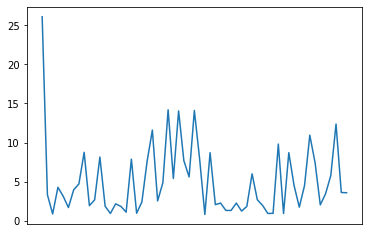

In [288]:
import matplotlib.pyplot as plt
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.plot(df_state_organic_content['State'],df_state_organic_content['Organic Matter RV Mean'])
plt.show()

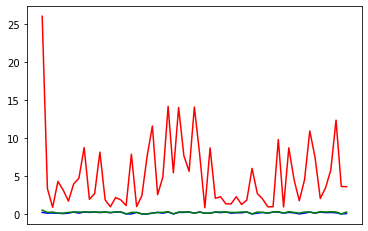

In [287]:
fig,ax = plt.subplots()
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.plot(df_state_organic_content['State'],df_state_organic_content['Organic Matter RV Mean'],color='r')
ax.plot(df_state_organic_content['State'],df_state_organic_content['Organic Matter 5th Percentile'],color='b')
ax.plot(df_state_organic_content['State'],df_state_organic_content['Organic Matter 10th Percentile'],color='g')
plt.show()

In [289]:
df_state_organic_content.to_excel('./data/US_State_Level_Organic_Matter_Data.xlsx')

## Visualization in Tableau
https://public.tableau.com/shared/8FXGD5W5Y?:display_count=n&:origin=viz_share_link